<a href="https://colab.research.google.com/github/muah48157/stock-predictor-app/blob/main/stock_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Liabraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

**Step 2: Load and Understand the Data**

In [ ]:
df = pd.read_csv("SHARADAR-Stock.csv")
print(df.head())

  ticker       date   open   high    low  close    volume  dividends  \
0    XOM  9/21/2018  85.01  85.43  84.52  85.17  26196749        0.0   
1    XOM  9/20/2018  84.86  85.34  84.54  84.82  10621638        0.0   
2    XOM  9/19/2018  83.64  84.77  83.64  84.63   9787326        0.0   
3    XOM  9/18/2018  83.90  84.13  83.45  83.63   8799790        0.0   
4    XOM  9/17/2018  83.00  83.61  82.99  83.41   7898451        0.0   

   closeunadj lastupdated  
0       85.17   9/21/2018  
1       84.82   9/20/2018  
2       84.63   9/19/2018  
3       83.63   9/18/2018  
4       83.41   9/17/2018  


**# Step 3: Select features and target**

In [ ]:
features = ['open', 'high', 'low', 'volume']
target = 'close'

X = df[features]
y = df[target]

# Step 2: Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# After train_test_split (Step 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save train and test data to separate CSV files
X_train.to_csv("train_features.csv", index=False)
X_test.to_csv("test_features.csv", index=False)
y_train.to_csv("train_target.csv", index=False)
y_test.to_csv("test_target.csv", index=False)

print("Train and test data saved to CSV files.")

Train and test data saved to CSV files.


**Step 4: Train the SVM regressor**

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svm_model = SVR(kernel='rbf')  # You can try 'linear' or 'poly' as well
svm_model.fit(X_train_scaled, y_train)

# Step 5: Make predictions and evaluate
y_pred = svm_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.99
R-squared: 1.00


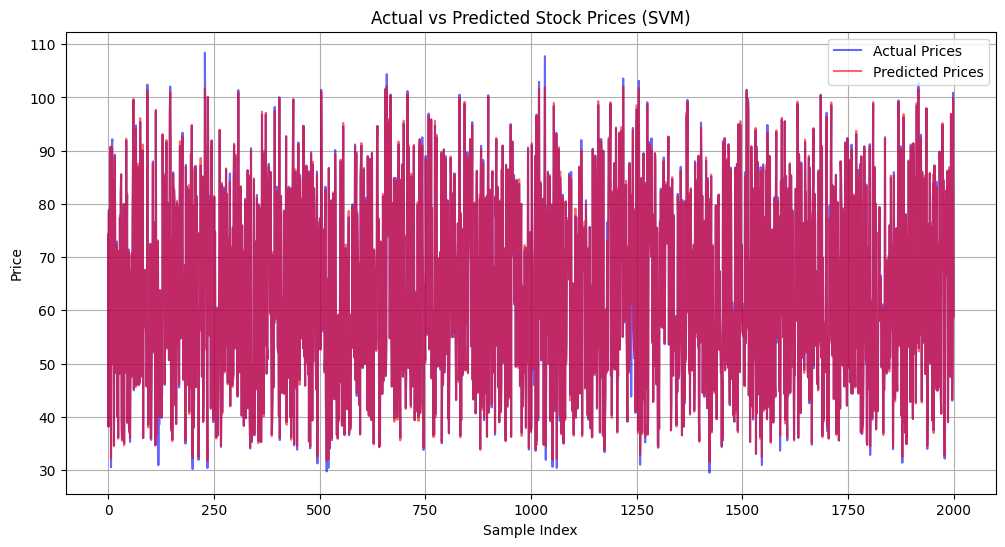

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue', alpha=0.6)
plt.plot(y_pred, label='Predicted Prices', color='red', alpha=0.6)
plt.title('Actual vs Predicted Stock Prices (SVM)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

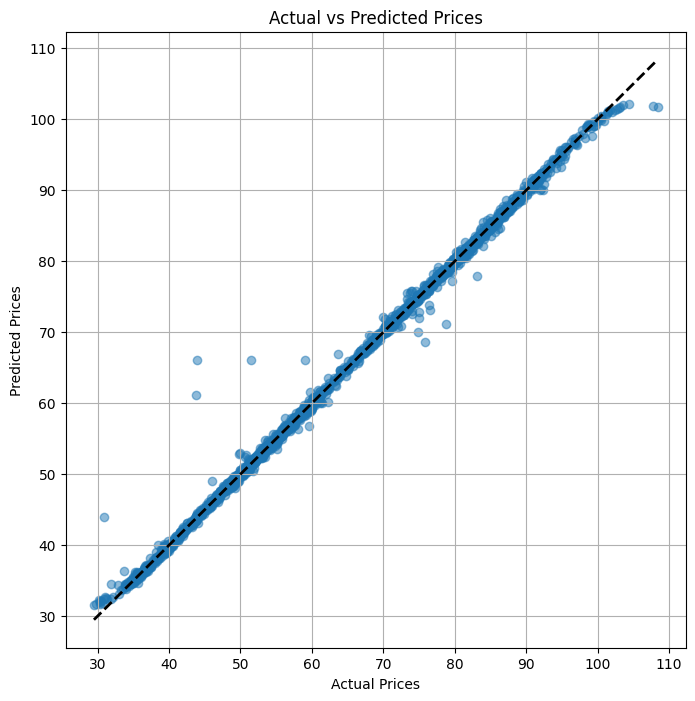

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

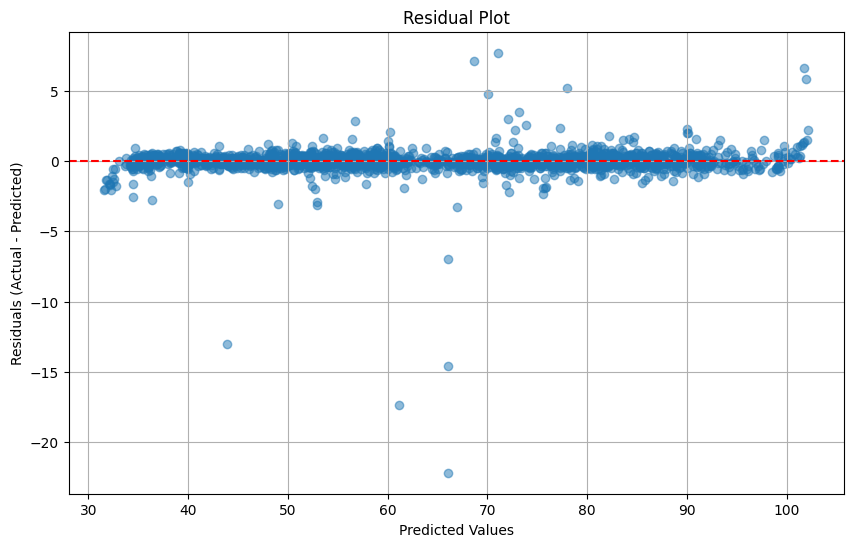

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

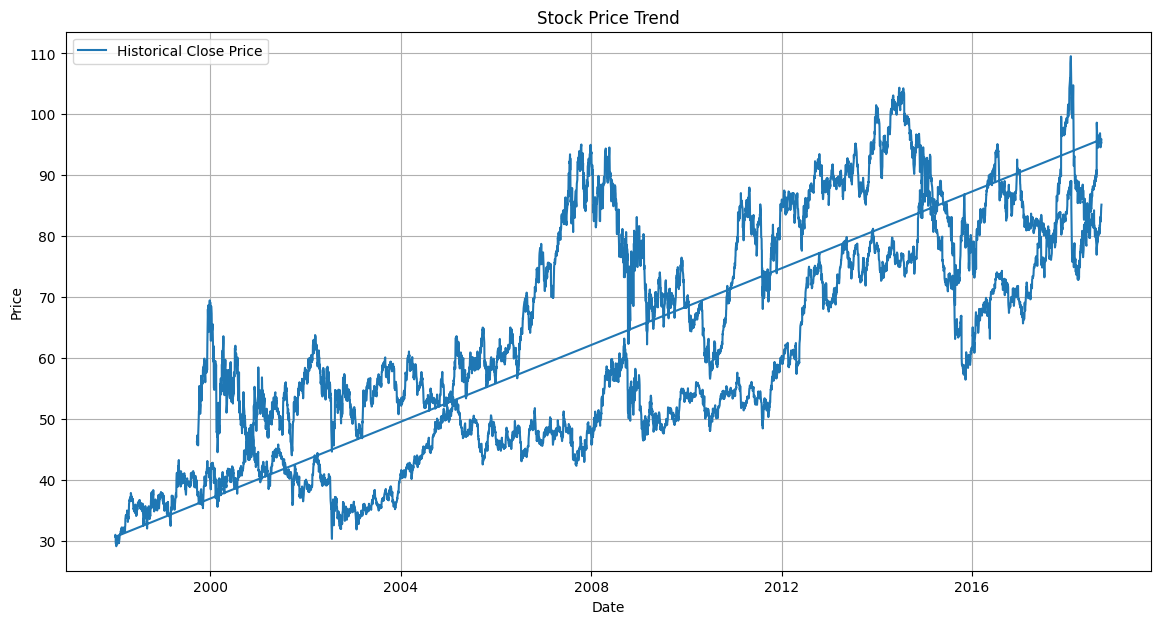

In [ ]:
df['date'] = pd.to_datetime(df['date'])  # Ensure you have a date column
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['close'], label='Historical Close Price')
plt.title('Stock Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import joblib

# Save model and scaler
joblib.dump(svm_model, "svm_stock_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']